In [118]:
import warnings

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import seaborn as sns
import xarray as xr

import oceans_sf as ocsf

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
warnings.filterwarnings("ignore")

In [119]:
ds = xr.load_dataset("example_data/langmuir_fields.nc")
ds = ds.isel(time=1)

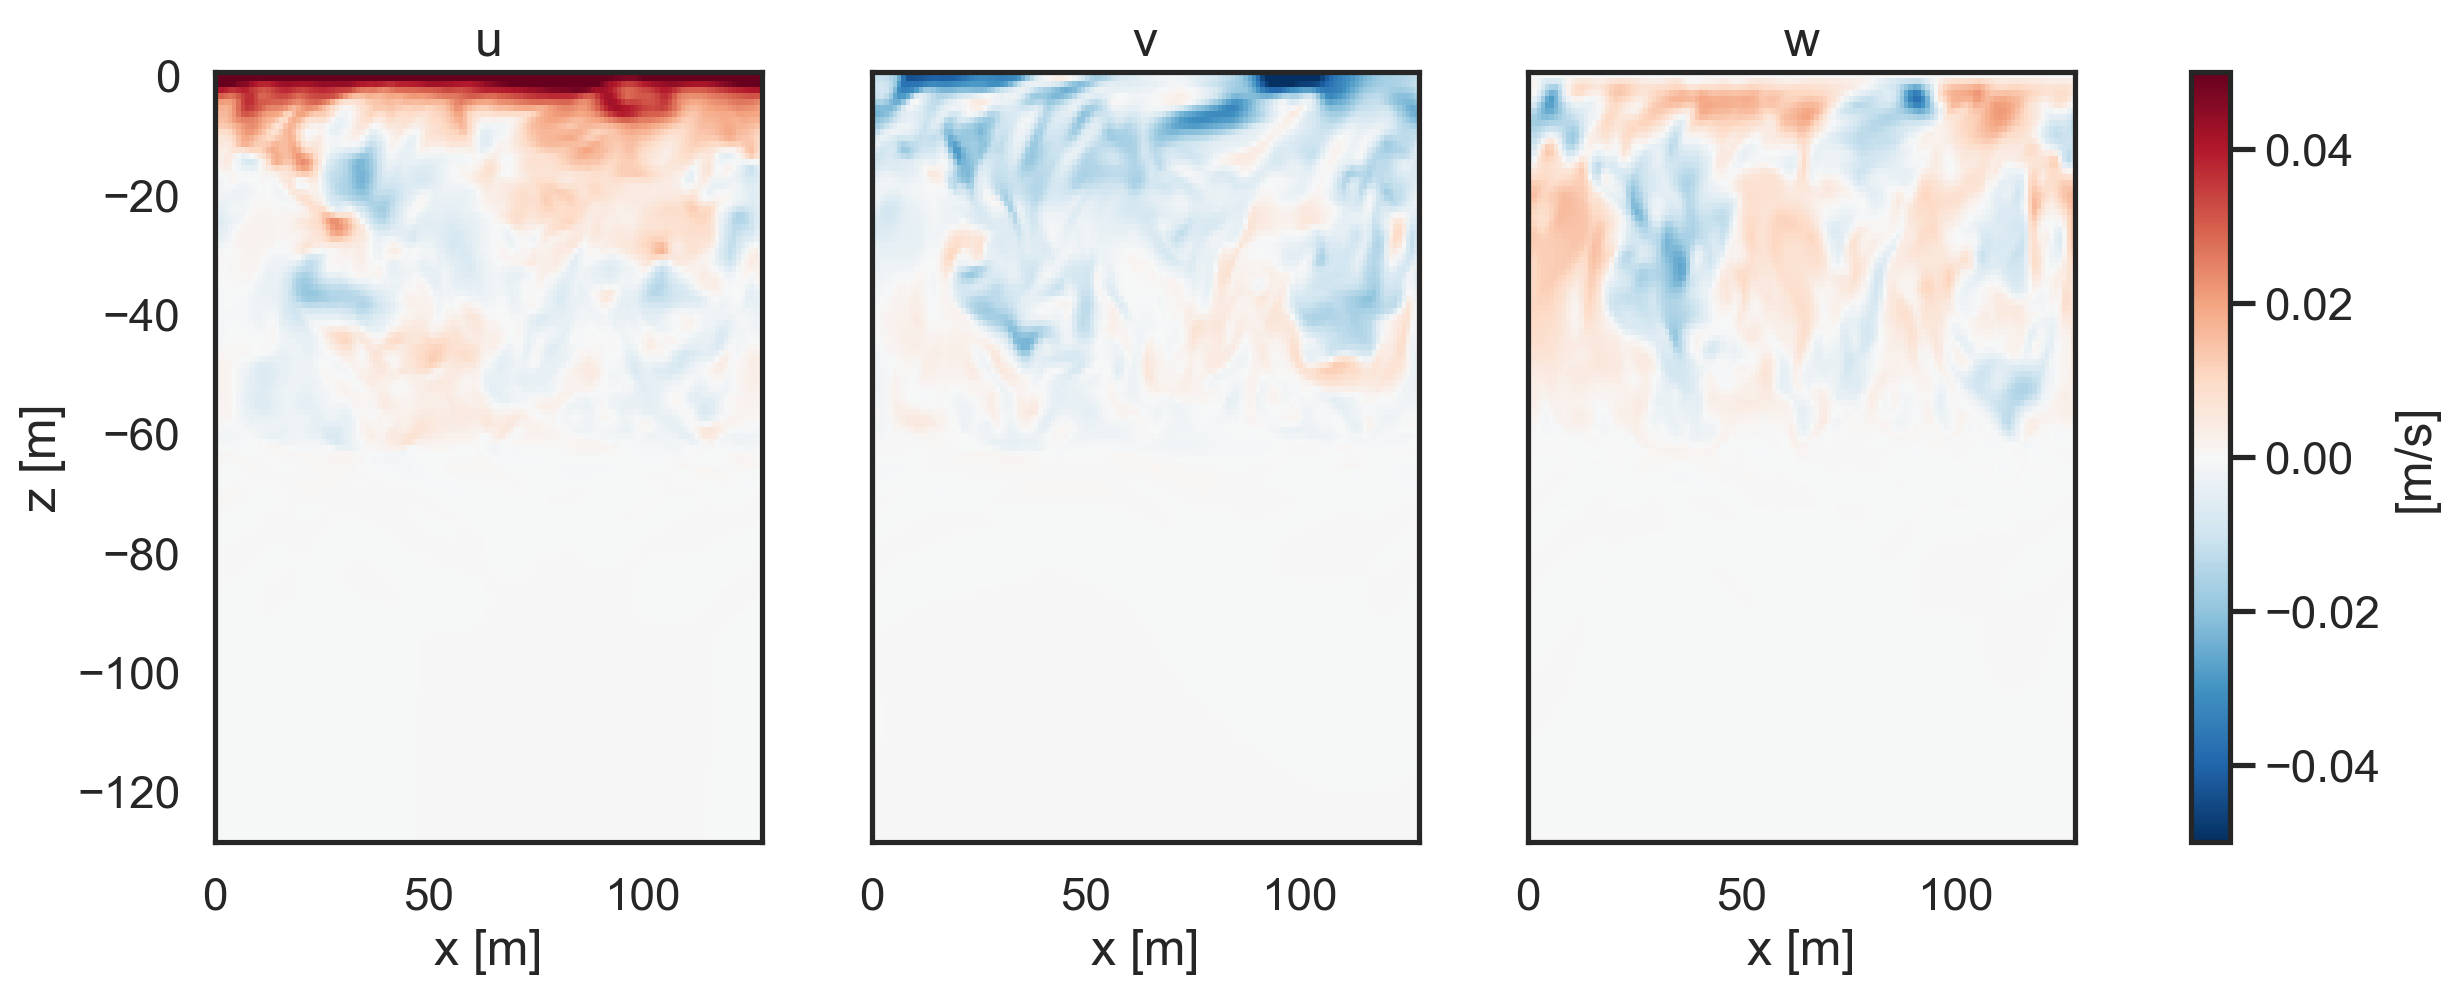

In [120]:
fig, ax = plt.subplots(1,3, figsize=(15,5),sharey=True)

pc1 = ax[0].pcolormesh(ds.xC, ds.zC, ds.u[:,64,:], cmap="RdBu_r",vmin=-0.05,vmax=0.05)
pc2 = ax[1].pcolormesh(ds.xC, ds.zC, ds.v[:,64,:], cmap="RdBu_r",vmin=-0.05,vmax=0.05)
pc3 = ax[2].pcolormesh(ds.xC, ds.zF, ds.w[:,64,:], cmap="RdBu_r",vmin=-0.05,vmax=0.05)

ax[0].set_ylabel("z [m]")
ax[0].set_xlabel("x [m]")
ax[1].set_xlabel("x [m]")
ax[2].set_xlabel("x [m]")

ax[0].set_title("u")
ax[1].set_title("v")
ax[2].set_title("w")

cbar = fig.colorbar(pc1, ax=ax, orientation="vertical",label='[m/s]')

In [121]:
nn = 128

sf = ocsf.generate_structure_functions_3d(
    ds.u.values[:nn,:nn,:nn], 
    ds.v.values[:nn,:nn,:nn], 
    ds.w.values[:nn,:nn,:nn], 
    ds.xF.values[:nn], 
    ds.yF.values[:nn], 
    ds.zF[:nn].values, 
    traditional_type=['LL','LLL','LTT'],
    boundary=["periodic-x", "periodic-y"]
)

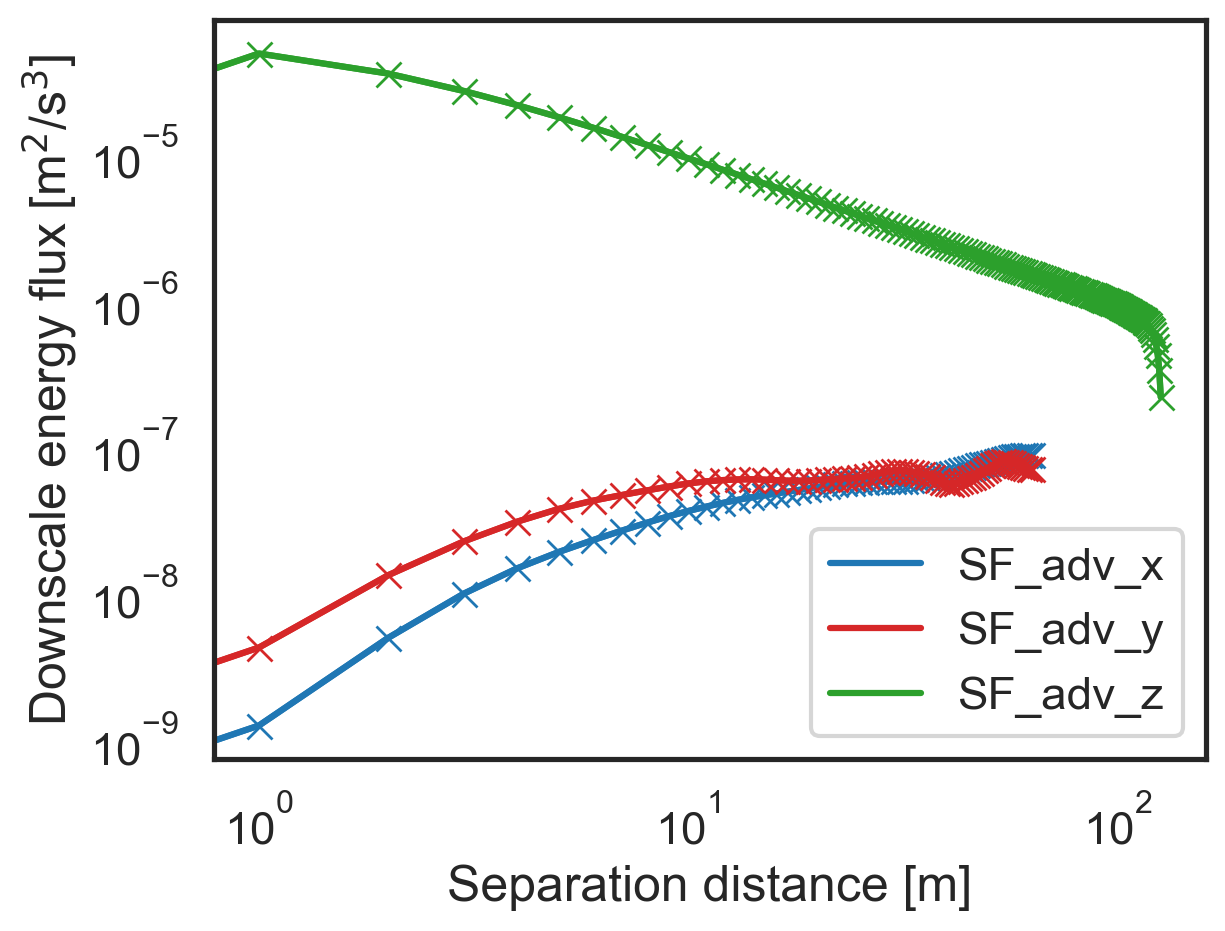

In [122]:
plt.loglog(sf['x-diffs'],abs(sf['SF_advection_velocity_x']/2),color='tab:blue',label='SF_adv_x')
plt.loglog(sf['y-diffs'],abs(sf['SF_advection_velocity_y']/2),color='tab:red',label='SF_adv_y')
plt.loglog(sf['z-diffs'],abs(sf['SF_advection_velocity_z']/2),color='tab:green',label='SF_adv_z')

plt.loglog(sf['x-diffs'],-(sf['SF_advection_velocity_x']/2),color='tab:blue',marker='x')
plt.loglog(sf['y-diffs'],-(sf['SF_advection_velocity_y']/2),color='tab:red',marker='x')
plt.loglog(sf['z-diffs'],-(sf['SF_advection_velocity_z']/2),color='tab:green',marker='x')

plt.xlabel('Separation distance [m]')
plt.ylabel('Downscale energy flux [m$^2$/s$^3$]')
plt.legend();

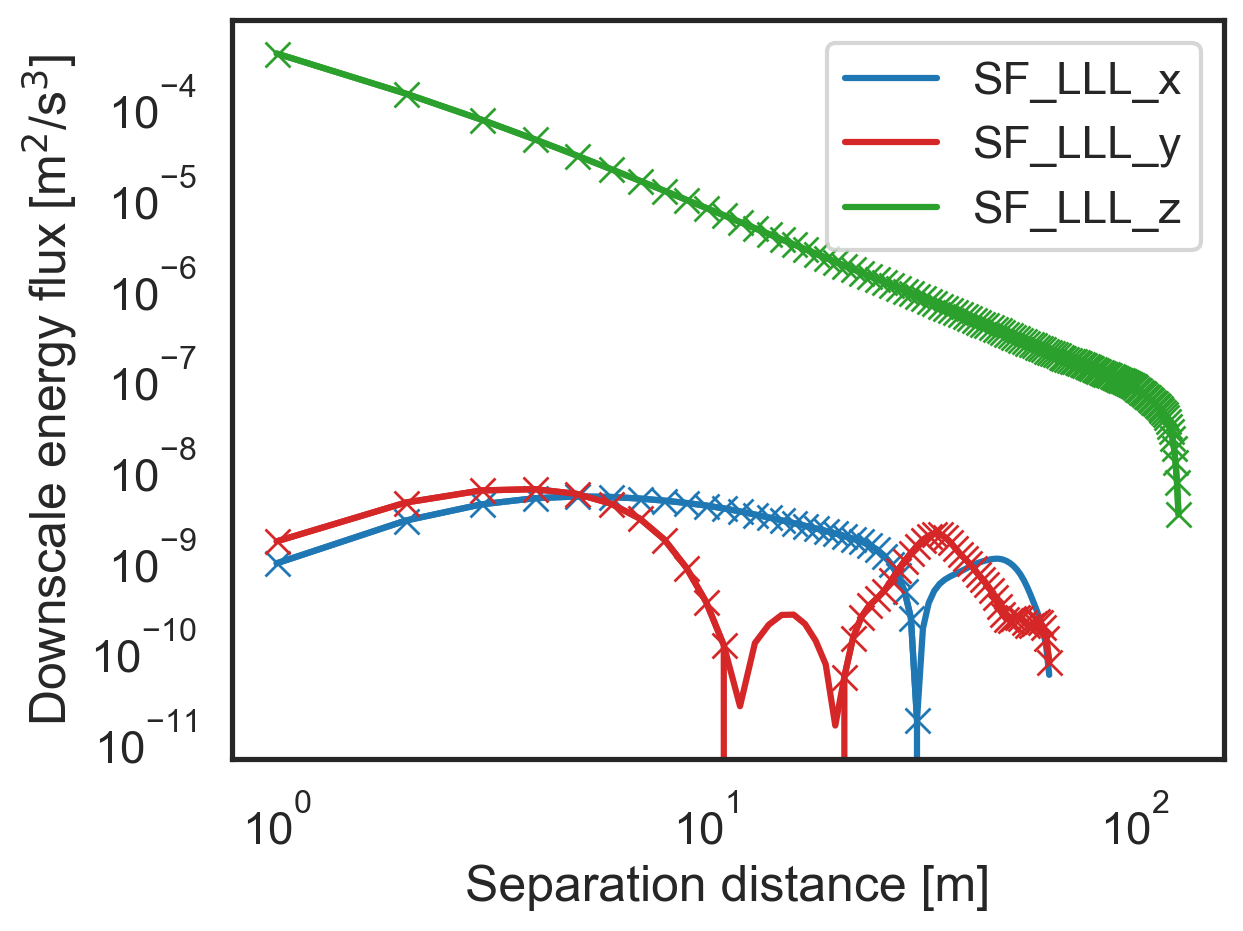

In [123]:
plt.loglog(sf['x-diffs'],abs(-5*sf['SF_LLL_x']/(4*sf['x-diffs'])),color='tab:blue',label='SF_LLL_x')
plt.loglog(sf['y-diffs'],abs(-5*sf['SF_LLL_y']/(4*sf['y-diffs'])),color='tab:red',label='SF_LLL_y')
plt.loglog(sf['z-diffs'],abs(-5*sf['SF_LLL_z']/(4*sf['z-diffs'])),color='tab:green',label='SF_LLL_z')

plt.loglog(sf['x-diffs'],-(-5*sf['SF_LLL_x']/(4*sf['x-diffs'])),color='tab:blue',marker='x')
plt.loglog(sf['y-diffs'],-(-5*sf['SF_LLL_y']/(4*sf['y-diffs'])),color='tab:red',marker='x')
plt.loglog(sf['z-diffs'],-(-5*sf['SF_LLL_z']/(4*sf['z-diffs'])),color='tab:green',marker='x')

plt.xlabel('Separation distance [m]')
plt.ylabel('Downscale energy flux [m$^2$/s$^3$]')
plt.legend();

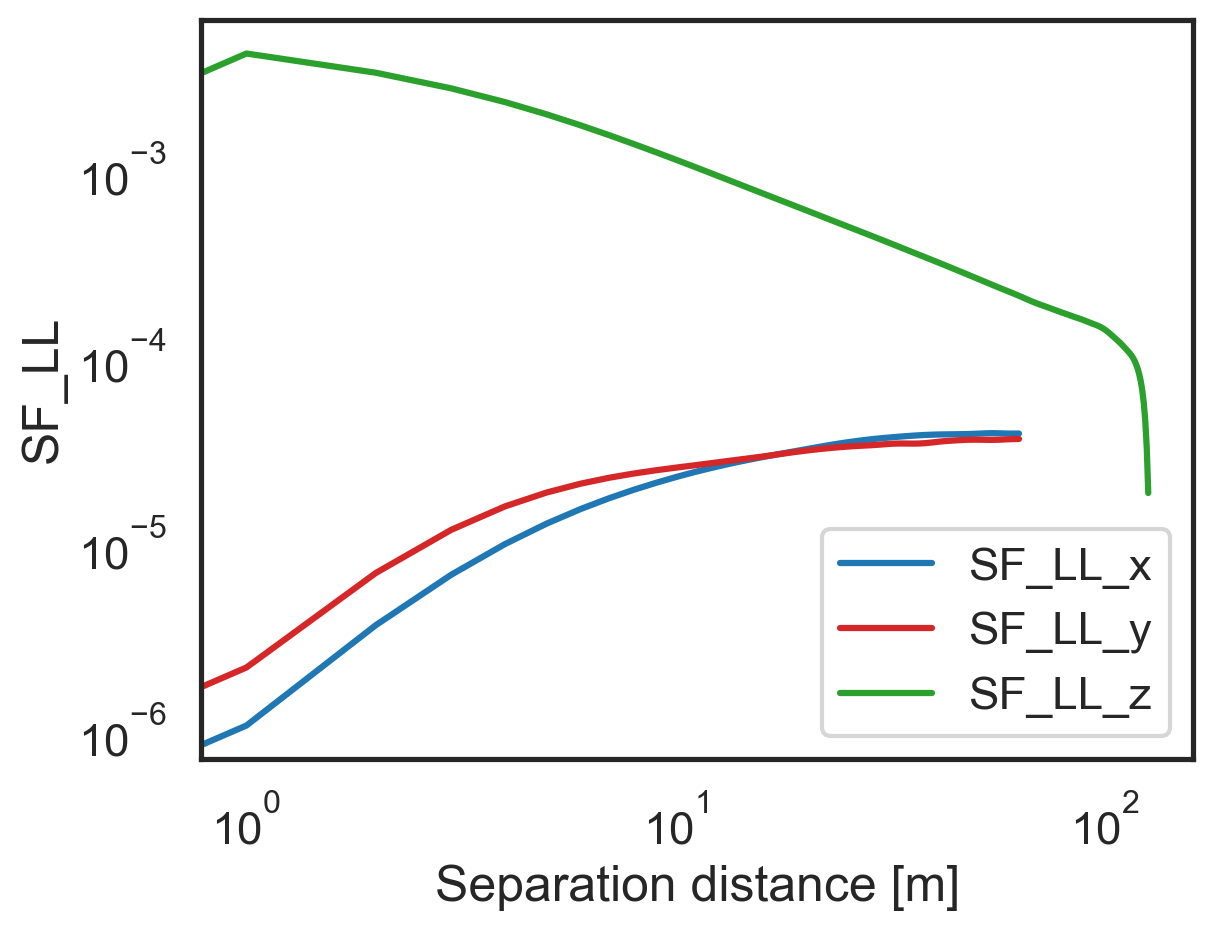

In [124]:
plt.loglog(sf['x-diffs'],sf['SF_LL_x'],label='SF_LL_x',color='tab:blue')
plt.loglog(sf['y-diffs'],sf['SF_LL_y'],label='SF_LL_y',color='tab:red')
plt.loglog(sf['z-diffs'],sf['SF_LL_z'],label='SF_LL_z',color='tab:green')

plt.xlabel('Separation distance [m]')
plt.ylabel('SF_LL')
plt.legend();